In [5]:
pip install pandera

     |████████████████████████████████| 165 kB 31.1 MB/s 


In [6]:
import pandas as pd
import pandera as pa

In [7]:
#df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/F1_Data/races.csv', error_bad_lines=False, sep=',')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/F1_Data/races.csv', sep=',')

In [8]:
df.rename(columns={
  "raceId":"ID_CORRIDA","year":"ANO","round":"ETAPA","circuitId":"ID_CIRCUITO",
  "name":"NOME_CORRIDA","date":"DATA","time":"HORARIO","url":"URL"}, inplace=True)
df.dtypes

ID_CORRIDA       int64
ANO              int64
ETAPA            int64
ID_CIRCUITO      int64
NOME_CORRIDA    object
DATA            object
HORARIO         object
URL             object
dtype: object

In [9]:
df["ID_CORRIDA"] = df["ID_CORRIDA"].astype("object")
df["ID_CIRCUITO"] = df["ID_CIRCUITO"].astype("object")
df["DATA"] = pd.to_datetime(df["DATA"])

In [10]:
schema = pa.DataFrameSchema(
    columns = {
        "ANO": pa.Column(pa.Int),
        "ETAPA": pa.Column(pa.String),
        "NOME_CORRIDA": pa.Column(pa.String),
        "HORARIO": pa.Column(pa.String, pa.Check.str_matches(r'^([0-1]?[0-9]|[2][0-3]):([0-5][0-9])(:[0-5][0-9])?$'), nullable=True),
        "URL": pa.Column(pa.String),
    })

In [11]:
df.dtypes

ID_CORRIDA              object
ANO                      int64
ETAPA                    int64
ID_CIRCUITO             object
NOME_CORRIDA            object
DATA            datetime64[ns]
HORARIO                 object
URL                     object
dtype: object

In [12]:
#Infos das Linhas e Colunas
# df.shape
# df.columns
# df.dtypes

#Estatisticas
# df.describe()

In [13]:
# Verificar nulos
df.isnull().sum()

# se caso houvesse algum valor nulo, poderia incluir dados da seguinte forma
# df["NomeColuna"].fillna(df["NomeColuna"].mean(), implace=True)

# ou zerar esses valores:
# df["NomeColuna"].fillna(0, implace=True)

# ou deletar a linha que tem esses alguma coluna nula:
# df.dropna(inplace=True)

# ou deletar a linha que tem uma coluna especifica nula:
# df.dropna(subset[["NomeColuna", inplace=True)

# ou deletar a linha que tem esses todas as colunas nula:
# df.dropna(how=all, inplace=True)

ID_CORRIDA      0
ANO             0
ETAPA           0
ID_CIRCUITO     0
NOME_CORRIDA    0
DATA            0
HORARIO         0
URL             0
dtype: int64

In [14]:
filtro = df["HORARIO"].str.contains('N')
df.loc[filtro]

,ID_CORRIDA,ANO,ETAPA,ID_CIRCUITO,NOME_CORRIDA,DATA,HORARIO,URL
89,90,2004,1,1,Australian Grand Prix,2004-03-07,\N,http://en.wikipedia.org/wiki/2004_Australian_G...
90,91,2004,2,2,Malaysian Grand Prix,2004-03-21,\N,http://en.wikipedia.org/wiki/2004_Malaysian_Gr...
91,92,2004,3,3,Bahrain Grand Prix,2004-04-04,\N,http://en.wikipedia.org/wiki/2004_Bahrain_Gran...
92,93,2004,4,21,San Marino Grand Prix,2004-04-25,\N,http://en.wikipedia.org/wiki/2004_San_Marino_G...
93,94,2004,5,4,Spanish Grand Prix,2004-05-09,\N,http://en.wikipedia.org/wiki/2004_Spanish_Gran...
...,...,...,...,...,...,...,...,...
834,835,1950,3,19,Indianapolis 500,1950-05-30,\N,http://en.wikipedia.org/wiki/1950_Indianapolis...
835,836,1950,4,66,Swiss Grand Prix,1950-06-04,\N,http://en.wikipedia.org/wiki/1950_Swiss_Grand_...
836,837,1950,5,13,Belgian Grand Prix,1950-06-18,\N,http://en.wikipedia.org/wiki/1950_Belgian_Gran...
837,838,1950,6,55,French Grand Prix,1950-07-02,\N,http://en.wikipedia.org/wiki/1950_French_Grand...


In [15]:
filtro2 = df["HORARIO"].str.contains('N')
df.replace(filtro2, pd.NA, inplace=True)

In [16]:
df["HORARIO"].str.contains('N')

0       False
1       False
2       False
3       False
4       False
        ...  
1053    False
1054    False
1055    False
1056    False
1057    False
Name: HORARIO, Length: 1058, dtype: bool

In [17]:
df["ANO"].value_counts(ascending=False)

2021    23
2019    21
2018    21
2016    21
2012    20
        ..
1961     8
1952     8
1951     8
1955     7
1950     7
Name: ANO, Length: 72, dtype: int64

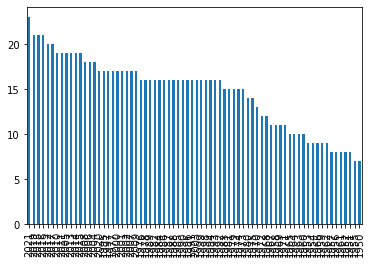

In [18]:
df["ANO"].value_counts(ascending=False).plot.bar()

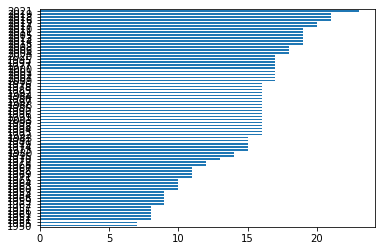

In [21]:
df["ANO"].value_counts(ascending=True).plot.barh()

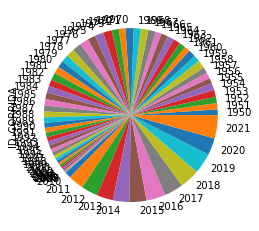

In [35]:
# df.groupby(df["DATA"].dt.year)["ID_CIRCUITO"].sum().plot.pie()
df.groupby(df["ANO"])["ID_CORRIDA"].sum().plot.pie()

In [36]:
df["NOME_CORRIDA"].value_counts()

British Grand Prix               72
Italian Grand Prix               72
Monaco Grand Prix                67
Belgian Grand Prix               66
German Grand Prix                64
French Grand Prix                61
Spanish Grand Prix               51
Canadian Grand Prix              50
Brazilian Grand Prix             48
United States Grand Prix         42
Hungarian Grand Prix             36
Australian Grand Prix            36
Japanese Grand Prix              36
Austrian Grand Prix              34
Dutch Grand Prix                 31
San Marino Grand Prix            26
South African Grand Prix         23
European Grand Prix              23
Mexican Grand Prix               20
Argentine Grand Prix             20
Malaysian Grand Prix             19
Portuguese Grand Prix            18
Bahrain Grand Prix               17
Chinese Grand Prix               16
Abu Dhabi Grand Prix             13
Singapore Grand Prix             12
Indianapolis 500                 11
Turkish Grand Prix          

Text(0, 0.5, 'ETAPA')

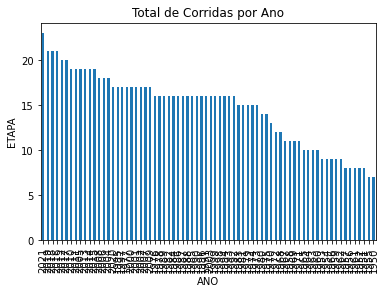

In [41]:
# ADICIONANDO UM TITULO E ALTERANDO O NOME DOS EIXOS
import matplotlib.pyplot as plt
df["ANO"].value_counts().plot.bar(title="Total de Corridas por Ano")
plt.xlabel("ANO")
plt.ylabel("ETAPA")

Text(0, 0.5, 'ETAPA')

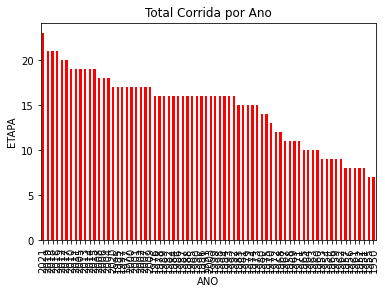

In [46]:
df["ANO"].value_counts().plot.bar(title="Total Corrida por Ano", color='red')
plt.xlabel("ANO")
plt.ylabel("ETAPA")

In [49]:
# NOVO ESTILO
plt.style.use("ggplot")

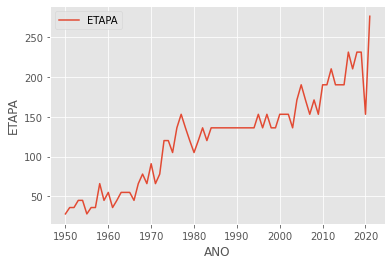

In [52]:
df.groupby(df["ANO"])["ETAPA"].sum().plot()
plt.xlabel("ANO")
plt.ylabel("ETAPA")
plt.legend();